In [1]:
import sympy as sp
def getMetric(lineElement, coordSystem="Cartesian", subs=None, overrideConst = False): #the override lets the code run faster if you know for sure your line element will work out
    if coordSystem not in ["Cartesian", "PlanePolar", "SphericalPolar", "CylindricalPolar"]:
        raise ValueError("Unknown coordinate system")

    lineElement=sp.expand(lineElement)
    coords = (t, x, y, z)

    dim = len(coords)
    g = sp.zeros(dim)

    for mu in range(dim):
        for nu in range(dim):
            coeff = lineElement.coeff(sp.diff(coords[mu]) * sp.diff(coords[nu]))
            if mu != nu and coeff != 0:
                g[mu, nu] = coeff.subs(subs) / 2
            else:
                g[mu, nu] = coeff.subs(subs)
                
    # Check for unexpected terms in the line element
    if not overrideConst:
        reconstructed_line_element = sum(g[i, j] * sp.diff(coords[i]) * sp.diff(coords[j]) for i in range(dim) for j in range(dim))
        if sp.simplify(lineElement.subs(subs) - reconstructed_line_element) != 0:
            raise ValueError("Line element contains terms that are not pure differentials of the coordinates used")
    return g

In [4]:
rs, R, lam = sp.symbols("r_s, R, lambda")
G, M, c = sp.symbols("G M c")

t = sp.Function('t')(lam)
x = sp.Function('x')(lam)
y = sp.Function('y')(lam)
z = sp.Function('z')(lam)

dt=sp.diff(t)
dx=sp.diff(x)
dy=sp.diff(y)
dz=sp.diff(z)

lineElement = (1-rs/4/R)**2/(1+rs/4/R)**2 *dt**2 -(1+rs/4/R)**4 *(dx**2+dy**2+dz**2)
display(lineElement)

# order of substitutions matter!!!
subs= [
    (R, sp.sqrt(x**2+y**2+z**2)),
    (rs, 2*G*M/(c**2))
]

metric=getMetric(lineElement, "Cartesian", subs)
metric

(1 - r_s/(4*R))**2*Derivative(t(lambda), lambda)**2/(1 + r_s/(4*R))**2 - (1 + r_s/(4*R))**4*(Derivative(x(lambda), lambda)**2 + Derivative(y(lambda), lambda)**2 + Derivative(z(lambda), lambda)**2)

Matrix([
[4*G**2*M**2/(c**4*(4*G**2*M**2/c**4 + 16*G*M*sqrt(x(lambda)**2 + y(lambda)**2 + z(lambda)**2)/c**2 + 16*x(lambda)**2 + 16*y(lambda)**2 + 16*z(lambda)**2)) - 2*G*M/(c**2*(G**2*M**2/(2*c**4*sqrt(x(lambda)**2 + y(lambda)**2 + z(lambda)**2)) + 2*G*M/c**2 + 2*sqrt(x(lambda)**2 + y(lambda)**2 + z(lambda)**2))) + 1/(G**2*M**2/(4*c**4*(x(lambda)**2 + y(lambda)**2 + z(lambda)**2)) + G*M/(c**2*sqrt(x(lambda)**2 + y(lambda)**2 + z(lambda)**2)) + 1),                                                                                                                                                                                                                                                                                     0,                                                                                                                                                                                                                                                                             

## computation connection coeffecients (christoffel)

In [5]:
import numpy as np
from itertools import product

metric_inv = metric.inv()
print("start computation")
n=4
X = [t, x, y, z]
# computing the symbols using the metric equation
# Create array to store the computed christoffel symbols.
christoffel_symbols = np.zeros(shape=n, dtype='object')
simple = False
for i in range(n):
    dummy_matrix = sp.Matrix.zeros(n,n)
    for (j,k,l) in product(range(n), repeat=3):
        dummy_matrix[j,k] += (
            sp.Rational(1/2)*metric_inv[i,l] * (sp.diff(metric[l,j],X[k]) 
            +sp.diff(metric[l,k],X[j]) - sp.diff(metric[j,k],X[l]))
        )
        print(f"done connection j: {j} k: {k} l: {l}")
    christoffel_symbols[i] = sp.simplify(dummy_matrix) if simple else dummy_matrix

start computation
done connection j: 0 k: 0 l: 0
done connection j: 0 k: 0 l: 1
done connection j: 0 k: 0 l: 2
done connection j: 0 k: 0 l: 3
done connection j: 0 k: 1 l: 0
done connection j: 0 k: 1 l: 1
done connection j: 0 k: 1 l: 2
done connection j: 0 k: 1 l: 3
done connection j: 0 k: 2 l: 0
done connection j: 0 k: 2 l: 1
done connection j: 0 k: 2 l: 2
done connection j: 0 k: 2 l: 3
done connection j: 0 k: 3 l: 0
done connection j: 0 k: 3 l: 1
done connection j: 0 k: 3 l: 2
done connection j: 0 k: 3 l: 3
done connection j: 1 k: 0 l: 0
done connection j: 1 k: 0 l: 1
done connection j: 1 k: 0 l: 2
done connection j: 1 k: 0 l: 3
done connection j: 1 k: 1 l: 0
done connection j: 1 k: 1 l: 1
done connection j: 1 k: 1 l: 2
done connection j: 1 k: 1 l: 3
done connection j: 1 k: 2 l: 0
done connection j: 1 k: 2 l: 1
done connection j: 1 k: 2 l: 2
done connection j: 1 k: 2 l: 3
done connection j: 1 k: 3 l: 0
done connection j: 1 k: 3 l: 1
done connection j: 1 k: 3 l: 2
done connection j: 1 

In [4]:
for i in range(n):
    display(christoffel_symbols[i])

Matrix([
[-v_s**2*(2*sigma*v_s*(1 - tanh(sigma*(-R + sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2)))**2)*(-v_s*t(lambda) + x(lambda))/sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2) - 2*sigma*v_s*(1 - tanh(sigma*(R + sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2)))**2)*(-v_s*t(lambda) + x(lambda))/sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2))*(-tanh(sigma*(-R + sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2))) + tanh(sigma*(R + sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2))))/(8*c**2*tanh(R*sigma)**2) + (-v_s*tanh(R*sigma - sigma*sqrt(v_s**2*t(lambda)**2 - 2*v_s*t(lambda)*x(lambda) + x(lambda)**2 + y(lambda)**2 + z(lambda)**2)) - v_s*tanh(R*sigma + sigma*sqrt(v_s**2*t(lambda)**2 - 2*v_s*t(lambda)*x(lambda) + x(lambda)**2 + y(lambda)**2 + z(lambda)**2)))*(-v_s**2*(-2*sigma*(1 - tanh(sigma*(-R + sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2)

Matrix([
[v_s**2*(-v_s*tanh(R*sigma - sigma*sqrt(v_s**2*t(lambda)**2 - 2*v_s*t(lambda)*x(lambda) + x(lambda)**2 + y(lambda)**2 + z(lambda)**2)) - v_s*tanh(R*sigma + sigma*sqrt(v_s**2*t(lambda)**2 - 2*v_s*t(lambda)*x(lambda) + x(lambda)**2 + y(lambda)**2 + z(lambda)**2)))*(2*sigma*v_s*(1 - tanh(sigma*(-R + sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2)))**2)*(-v_s*t(lambda) + x(lambda))/sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2) - 2*sigma*v_s*(1 - tanh(sigma*(R + sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2)))**2)*(-v_s*t(lambda) + x(lambda))/sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2))*(-tanh(sigma*(-R + sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2))) + tanh(sigma*(R + sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2))))/(16*c**2*tanh(R*sigma)**3) + (-v_s**2*(-2*sigma*(1 - tanh(sigma*(-R + sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2)

Matrix([
[-v_s**2*(-2*sigma*(1 - tanh(sigma*(-R + sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2)))**2)*y(lambda)/sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2) + 2*sigma*(1 - tanh(sigma*(R + sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2)))**2)*y(lambda)/sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2))*(-tanh(sigma*(-R + sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2))) + tanh(sigma*(R + sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2))))/(8*tanh(R*sigma)**2), v_s*(-sigma*(1 - tanh(sigma*(-R + sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2)))**2)*y(lambda)/sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2) + sigma*(1 - tanh(sigma*(R + sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2)))**2)*y(lambda)/sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2))/(4*tanh(R*sigma)), 0, 0],
[                   

Matrix([
[-v_s**2*(-2*sigma*(1 - tanh(sigma*(-R + sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2)))**2)*z(lambda)/sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2) + 2*sigma*(1 - tanh(sigma*(R + sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2)))**2)*z(lambda)/sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2))*(-tanh(sigma*(-R + sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2))) + tanh(sigma*(R + sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2))))/(8*tanh(R*sigma)**2), v_s*(-sigma*(1 - tanh(sigma*(-R + sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2)))**2)*z(lambda)/sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2) + sigma*(1 - tanh(sigma*(R + sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2)))**2)*z(lambda)/sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2))/(4*tanh(R*sigma)), 0, 0],
[                   

In [6]:
C = christoffel_symbols

Definitions of momenta using trajectory of photon:

$$
\frac{dt}{d\lambda}-p^t=0
$$
$$
\frac{dx}{d\lambda}-p^x=0
$$
$$
\frac{dy}{d\lambda}-p^y=0
$$

In [7]:
pt = sp.diff(t, lam)
px = sp.diff(x, lam)
py = sp.diff(y, lam)
pz = sp.diff(y, lam)

In [8]:
Ct, Cx, Cy, Cz = C[0], C[1], C[2], C[3]
dptdl = -1 * (Ct[0,0] * pt**2 + Ct[1,1] * px**2 + Ct[2,2] * py**2 + Ct[3,3] * pz**2 + 2 * (Ct[0,1] * pt * px + Ct[0,2] * pt * py + Ct[0,3] * pt * pz + Ct[1,2] * px * py + Ct[1,3] * px * pz + Ct[2,3] * py * pz))
dpxdl = -1 * (Cx[0,0] * pt**2 + Cx[1,1] * px**2 + Cx[2,2] * py**2 + Cx[3,3] * pz**2 + 2 * (Cx[0,1] * pt * px + Cx[0,2] * pt * py + Cx[0,3] * pt * pz + Cx[1,2] * px * py + Cx[1,3] * px * pz + Cx[2,3] * py * pz))
dpydl = -1 * (Cy[0,0] * pt**2 + Cy[1,1] * px**2 + Cy[2,2] * py**2 + Cy[3,3] * pz**2 + 2 * (Cy[0,1] * pt * px + Cy[0,2] * pt * py + Cy[0,3] * pt * pz + Cy[1,2] * px * py + Cy[1,3] * px * pz + Cy[2,3] * py * pz))
dpzdl = -1 * (Cz[0,0] * pt**2 + Cz[1,1] * px**2 + Cz[2,2] * py**2 + Cz[3,3] * pz**2 + 2 * (Cz[0,1] * pt * px + Cz[0,2] * pt * py + Cz[0,3] * pt * pz + Cz[1,2] * px * py + Cz[1,3] * px * pz + Cz[2,3] * py * pz))

# dptdl = dptdl.simplify()
# dpxdl = dpxdl.simplify()
# dpydl = dpydl.simplify()
# dpzdl = dpzdl.simplify()

In [119]:
import numpy as np
import time

# dLambda
dL=0.001
meters = 33
count = 0
angles_len = 200
angles = np.linspace(0, 2*np.pi, angles_len)

G_val=1
c_val=1
M_val=1


values = np.zeros((angles_len, 8))
values[:,0] = 0 
values[:, 1] = -5
values[:, 2] = np.linspace(-1, 5, angles_len)
values[:, 3] = 0
values[:, 5] = 1 # x'
values[:, 6] = 0 #y'
values[:, 7] = 0 # z'

Bquad=2*(metric[0, 1]*px+metric[0, 2]*py+metric[0, 3]*pz)
Cquad=metric[1, 1]*px**2+metric[2, 2]*py**2+metric[3, 3]*pz**2+2*(
      metric[1, 2]*px*py+metric[1, 3]*px*pz+metric[2, 3]*py*pz
)


pt1 = (-Bquad+sp.sqrt(Bquad**2-4*metric[0,0]*Cquad))/(2*metric[0,0])
pt2 = ((-Bquad - sp.sqrt(Bquad**2 - 4 * metric[0, 0] * Cquad)) / (2 * metric[0, 0]))

pt1.subs(
    [(t, -t)]
)

pt1_lambda = sp.lambdify((t,x,y,z,G,M,c,px,py,pz), pt1, "numpy")
pt2_lambda = sp.lambdify((t,x,y,z,G,M,c,px,py,pz), pt2, "numpy")
args = (values[:, 0], values[:, 1], values[:, 2], values[:, 3], G_val, M_val, c_val, values[:, 5], values[:, 6], values[:, 7])

values[:,4]=pt1_lambda(*args)
print(values)

[[ 0.         -5.         -1.         ...  1.          0.
   0.        ]
 [ 0.         -5.         -0.96984925 ...  1.          0.
   0.        ]
 [ 0.         -5.         -0.93969849 ...  1.          0.
   0.        ]
 ...
 [ 0.         -5.          4.93969849 ...  1.          0.
   0.        ]
 [ 0.         -5.          4.96984925 ...  1.          0.
   0.        ]
 [ 0.         -5.          5.         ...  1.          0.
   0.        ]]


In [120]:
# define initial conditions
dt=sp.diff(t)
dx=sp.diff(x)
dy=sp.diff(y)
dz=sp.diff(z)
geods=[]
iterations = int(meters//dL)
L = 0
# append a numpy copy of the array to geod
geods.append(np.copy(values))

dptdl_lambda = sp.lambdify((t, x, y, z, dt, dx, dy, dz, G, M,c), dptdl, "numpy")
dpxdl_lambda = sp.lambdify((t, x, y, z, dt, dx, dy, dz, G, M,c), dpxdl, "numpy")
dpydl_lambda = sp.lambdify((t, x, y, z, dt, dx, dy, dz, G, M,c), dpydl, "numpy")
dpzdl_lambda = sp.lambdify((t, x, y, z, dt, dx, dy, dz, G, M,c), dpzdl, "numpy")

print("starting iterations")
start = time.time()

for i in range(iterations):
    L_=L
    L+=dL

    args = (values[:, 0], values[:, 1], values[:, 2], values[:, 3], values[:, 4], values[:, 5], values[:, 6],
            values[:, 7], G_val, M_val, c_val)

    dp=[
        dptdl_lambda(*args),
        dpxdl_lambda(*args),
        dpydl_lambda(*args),
        dpzdl_lambda(*args)
    ]

    values[:,4:] += dL * np.array(dp).T # update the velocities
    values[:, 0:4] += dL * values[:, 4:] # update positions
    geods.append(np.copy(values))
    count += 1
    print("Percentage done: {:3.5f} %".format((count/iterations)*100), end="\r")




print("Elapsed time: {:3.2f} seconds".format(time.time()-start))
geods = np.array(geods)
print(geods.shape)

starting iterations
Elapsed time: 724.82 seconds
(33000, 200, 8)


## Plotting

In [51]:
import plotly.graph_objects as go
import numpy as np

geods_transposed = geods.transpose(1, 0, 2)

fig = go.Figure()
count = 0


for geod_angle in geods_transposed:
  positions = geod_angle[:, 0:4]
  velocities = geod_angle[:, 4:]

  ts, xs, ys, zs = zip(*positions)
  tps, xps, yps, zps =  zip(*velocities)

  # Plot for velocity
  fig.add_trace(go.Scatter3d(x=xs, y=ys, z=zs, mode='lines'))

  # Add initial velocity vector
  fig.add_trace(go.Cone(x=[xs[0]], y=[ys[0]], z=[zs[0]],
              u=[tps[0]], v=[xps[0]], w=[yps[0]],
              sizemode="scaled",
              sizeref=0.2,
              anchor="tail"))
  count += 1
  print("plotting, currently: {}%".format(str((count/rayCount)*100)), end="\r")

fig.update_layout(scene = dict(
    xaxis=dict(range=[-20, 20], title='X Position(x)'),
    yaxis=dict(range=[-20, 20], title='Y Position (y)'),
    zaxis=dict(range=[-20, 20], title='Z Position (z)'),
    xaxis_title='X Position(x)',
    yaxis_title="Y Position (y)",
    zaxis_title="Z Position (z)"),
    width=700,
    margin=dict(r=20, b=10, l=10, t=10))
print("showing figure now ..")
fig.show()

KeyboardInterrupt: 

In [42]:
import matplotlib.pyplot as plt

geods_transposed = geods.transpose(1, 0, 2)
r_alc=R_val

# Creating 2D plots for t-x, t-y, and x-y
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 10))  # 1 row, 3 columns

for geod_angle in geods_transposed: 
    positions = geod_angle[:, 0:4]
    velocities = geod_angle[:, 4:]

    ts, xs, ys, zs = zip(*positions)
    tps, xps, yps, zps = zip(*velocities)

    ax1.plot(ts, xs, '.-', linewidth=0.5)
    ax1.set_xlabel('Time (t)')
    ax1.set_ylabel('X Position (x)')
    ax1.set_title('Time vs X Position')
    ax1.grid(True)

    ax2.plot(ts, ys, '.-', linewidth=0.5)
    ax2.set_xlabel('Time (t)')
    ax2.set_ylabel('Y Position (y)')
    ax2.set_title('Time vs Y Position')
    ax2.grid(True)

    # x-y plot with lines in blue
    ax3.plot(xs, ys, '.-', linewidth=1, color='blue')
    ax3.set_xlabel('X Position (x)')
    ax3.set_ylabel('Y Position (y)')
    ax3.set_title('X Position vs Y Position')
    ax3.grid(True)

# Adding a translucent red circle at (0,0)
circle = plt.Circle((0, 0), r_alc, color='red', alpha=0.8)
ax3.add_artist(circle)
ax3.set_ylim(-10, 10)

# Display the plots next to each other
plt.tight_layout()
plt.show()


NameError: name 'R_val' is not defined

In [58]:
geods.transpose(1, 0, 2)[0:9].shape

(9, 33000, 8)

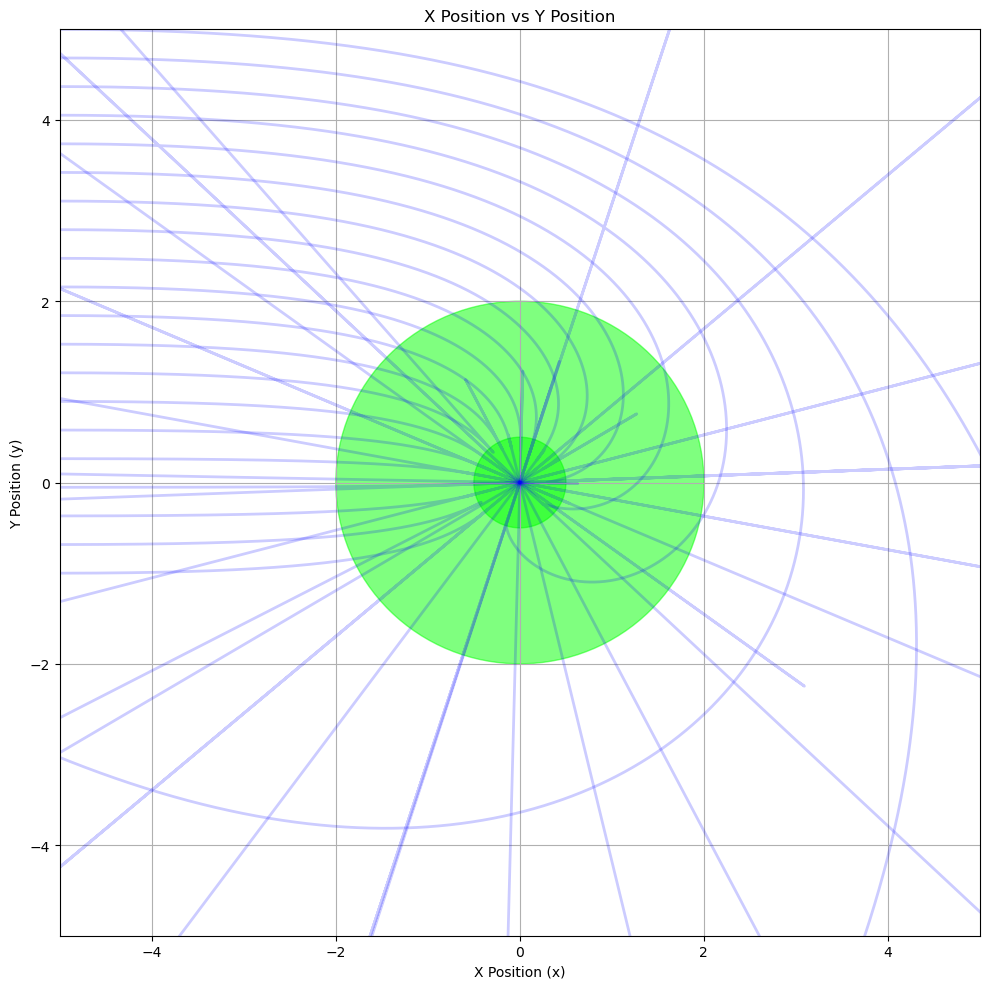

In [110]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches


# geods_transposed = geods.transpose(1, 0, 2)[36:37]
geods_transposed = geods.transpose(1, 0, 2)

# Creating the x-y plot with a 3x1 aspect ratio
fig, ax3 = plt.subplots(1, figsize=(10, 10))  # Only one subplot

for geod_angle in geods_transposed: 
    positions = geod_angle[:, 0:4]
    ts, xs, ys, zs = zip(*positions)

    # x-y plot with lines in blue, more defined dotted style and transparency
    ax3.plot(xs, ys, linestyle='-', linewidth=2, color='blue', alpha=0.2)  # Adjust alpha for better transparency

ax3.set_xlabel('X Position (x)')
ax3.set_ylabel('Y Position (y)')
ax3.set_title('X Position vs Y Position')
ax3.grid(True)

# Adding a translucent red circle at (0,0)
circle = plt.Circle((0, 0), 2*G_val*M_val/c_val**2, color='lime', alpha=0.5)
circle2 = plt.Circle((0, 0), 0.5*G_val*M_val/c_val**2, color='lime', alpha=0.5)
ax3.add_artist(circle)
ax3.add_artist(circle2)

ax3.set_ylim(-5, 5)
ax3.set_xlim(-5, 5)

plt.tight_layout()
plt.show()


Plotting 4308 points out of 33000
Plotting 4194 points out of 33000
Plotting 4124 points out of 33000
Plotting 4096 points out of 33000
Plotting 4110 points out of 33000
Plotting 4166 points out of 33000
Plotting 4265 points out of 33000
Plotting 4410 points out of 33000
Plotting 4606 points out of 33000
Plotting 4859 points out of 33000
Plotting 5180 points out of 33000
Plotting 5584 points out of 33000
Plotting 6098 points out of 33000
Plotting 6766 points out of 33000
Plotting 7679 points out of 33000
Plotting 9056 points out of 33000
Plotting 11689 points out of 33000
Plotting 33000 points out of 33000
Plotting 33000 points out of 33000
Plotting 33000 points out of 33000


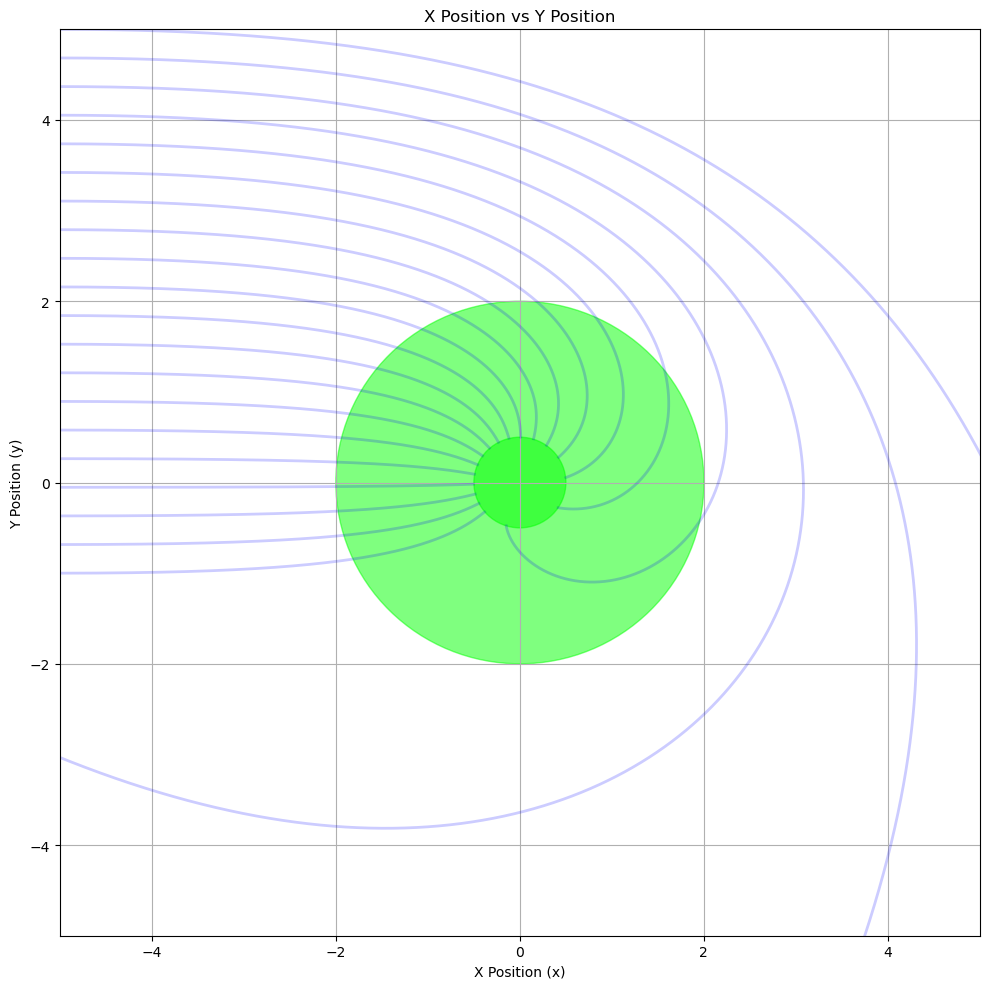

In [115]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Example definitions if not defined elsewhere in your code
G_val, M_val, c_val = 1, 1, 1  # Assuming values for constants

geods_transposed = geods.transpose(1, 0, 2)

fig, ax3 = plt.subplots(1, figsize=(10, 10))

inner_radius = 0.5  # Set the radius within which photons disappear

for geod_angle in geods_transposed:
    positions = geod_angle[:, 0:4]
    ts, xs, ys, zs = zip(*positions)

    # Calculate distance from origin for each point
    distance_from_origin = np.sqrt(np.array(xs)**2 + np.array(ys)**2)

    # Find the index of the first point inside the inner radius
    inside_indices = np.where(distance_from_origin <= inner_radius)[0]
    if inside_indices.size > 0:
        first_inside_index = inside_indices[0]
        xs = xs[:first_inside_index]
        ys = ys[:first_inside_index]
    else:
        xs = xs
        ys = ys

    # Check how many points are being plotted
    print(f"Plotting {len(xs)} points out of {len(distance_from_origin)}")

    ax3.plot(xs, ys, linestyle='-', linewidth=2, color='blue', alpha=0.2)

ax3.set_xlabel('X Position (x)')
ax3.set_ylabel('Y Position (y)')
ax3.set_title('X Position vs Y Position')
ax3.grid(True)

# Draw Schwarzschild and inner radius circles
schwarzschild_radius = 2 * G_val * M_val / c_val**2
circle = patches.Circle((0, 0), schwarzschild_radius, color='lime', alpha=0.5)
circle2 = patches.Circle((0, 0), inner_radius, color='lime', alpha=0.5)
ax3.add_artist(circle)
ax3.add_artist(circle2)

ax3.set_ylim(-5, 5)
ax3.set_xlim(-5, 5)

plt.tight_layout()
plt.show()


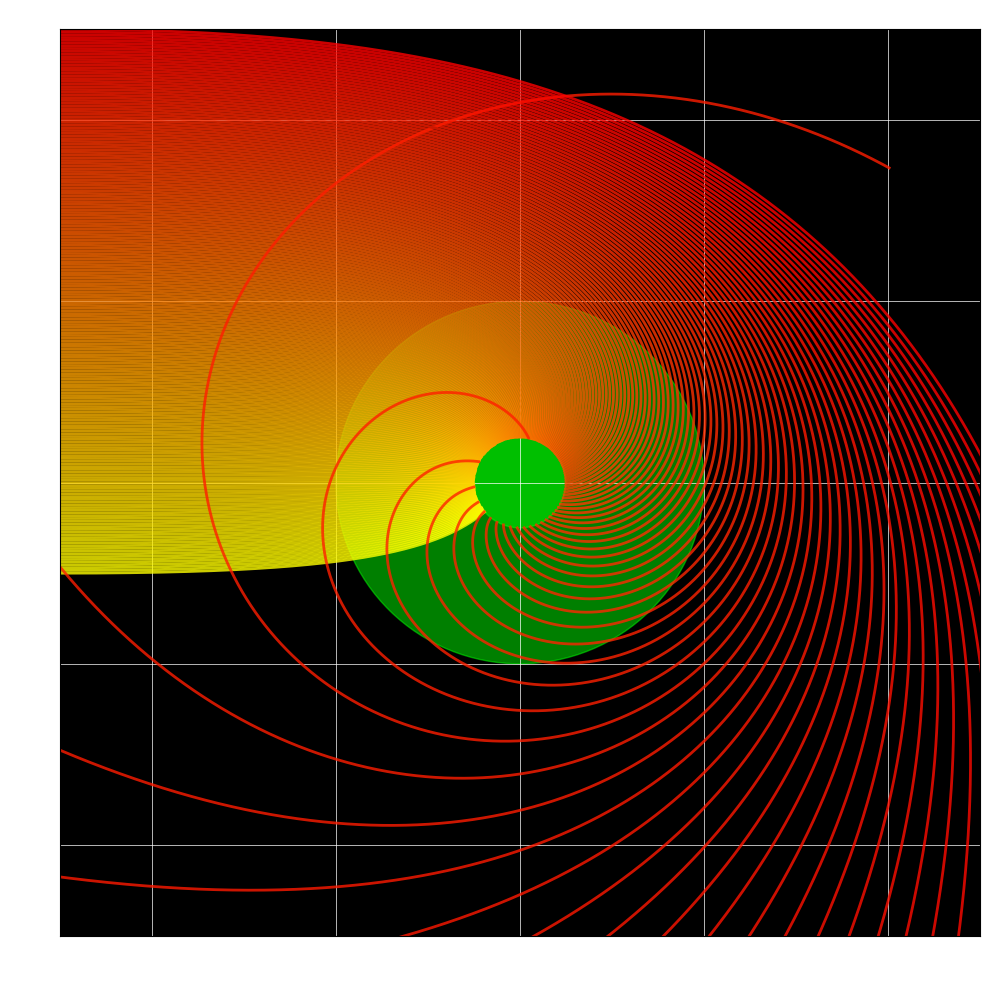

In [125]:
import matplotlib.cm as cm  # Import colormap

# Example definitions if not defined elsewhere in your code
G_val, M_val, c_val = 1, 1, 1  # Assuming values for constants

geods_transposed = geods.transpose(1, 0, 2)

fig, ax3 = plt.subplots(1, figsize=(10, 10))

inner_radius = 0.5  # Set the radius within which photons disappear

# Change background and grid lines
ax3.set_facecolor('black')  # Set background color to black
ax3.grid(True, which='both', color='white', linestyle='-', linewidth=0.5)  # White grid lines

for index, geod_angle in enumerate(geods_transposed):
    positions = geod_angle[:, 0:4]
    ts, xs, ys, zs = zip(*positions)

    # Calculate distance from origin for each point
    distance_from_origin = np.sqrt(np.array(xs)**2 + np.array(ys)**2)

    # Find the index of the first point inside the inner radius
    inside_indices = np.where(distance_from_origin <= inner_radius)[0]
    if inside_indices.size > 0:
        first_inside_index = inside_indices[0]
        xs = xs[:first_inside_index]
        ys = ys[:first_inside_index]
    else:
        xs = xs
        ys = ys

    # Setting a color gradient for each ray based on its index
    color = cm.autumn_r(index / len(geods_transposed))  # Choose a colormap and normalize index

    ax3.plot(xs, ys, linestyle='-', linewidth=2, color=color, alpha=0.8)  # Using the colormap

ax3.set_xlabel('X Position (x)', color='white')
ax3.set_ylabel('Y Position (y)', color='white')
ax3.set_title('X Position vs Y Position', color='white')
ax3.tick_params(axis='x', colors='white')  # Set x-axis tick colors to white
ax3.tick_params(axis='y', colors='white')  # Set y-axis tick colors to white

# Draw Schwarzschild and inner radius circles
schwarzschild_radius = 2 * G_val * M_val / c_val**2
circle = patches.Circle((0, 0), schwarzschild_radius, color='lime', alpha=0.5)
circle2 = patches.Circle((0, 0), inner_radius, color='lime', alpha=0.5)
ax3.add_artist(circle)
ax3.add_artist(circle2)

ax3.set_ylim(-5, 5)
ax3.set_xlim(-5, 5)

plt.tight_layout()
plt.show()


In [84]:
np.max(np.linalg.norm(geods.transpose(1, 0, 2)[37][:, 4:], axis=1))

140793.87340860342

In [89]:
np.linalg.norm(geods.transpose(1, 0, 2)[37][:, 4:], axis=1)

array([1.66936072e+00, 1.66953628e+00, 1.66971195e+00, ...,
       1.40740700e+05, 1.40740700e+05, 1.40740700e+05])

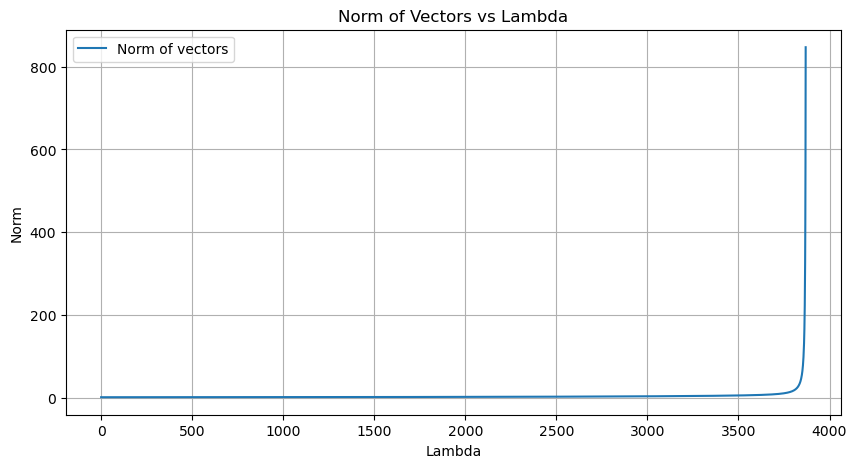

In [104]:
norms = np.linalg.norm(geods.transpose(1, 0, 2)[37][:, 4:], axis=1)[:3870]

# Plotting
plt.figure(figsize=(10, 5))  # Set the figure size
plt.plot(norms, label='Norm of vectors')  # Plot the norms
plt.xlabel('Lambda')  # Label for the x-axis
plt.ylabel('Norm')  # Label for the y-axis
plt.title('Norm of Vectors vs Lambda')  # Title of the plot
plt.legend()  # Show legend
plt.grid(True)  # Enable grid for easier readability
plt.show()  # Display the plot


In [27]:
1/np.sqrt(1-vs_val**2)

1.0482848367219182

In [15]:
metric_lambda = sp.lambdify((t,x,y,z,vs,R,sigma,c), metric, "numpy")
v_test=values[4]
row=v_test[4:]
A=np.dot(np.matmul(row.T, metric_lambda(v_test[0], v_test[1], v_test[2], v_test[3], vs_val, R_val, sigma_val, 1)))
A

NameError: name 'vs' is not defined

1

In [76]:
np.arange(-1.5,1.5,3/20)

array([-1.5000000e+00, -1.3500000e+00, -1.2000000e+00, -1.0500000e+00,
       -9.0000000e-01, -7.5000000e-01, -6.0000000e-01, -4.5000000e-01,
       -3.0000000e-01, -1.5000000e-01, -8.8817842e-16,  1.5000000e-01,
        3.0000000e-01,  4.5000000e-01,  6.0000000e-01,  7.5000000e-01,
        9.0000000e-01,  1.0500000e+00,  1.2000000e+00,  1.3500000e+00])

In [21]:
xGspan, yGspan = np.linspace(-15, 15, 200),np.linspace(-15, 15, 200)
X, Y = np.meshgrid(xGspan, yGspan)

gravPot = sp.lambdify((t,x,y,z,G,M,c), -0.5*(metric[0, 0]+1), "numpy")
args = (0, X, Y, 0, G_val , M_val, c_val)

pots=gravPot(*args)

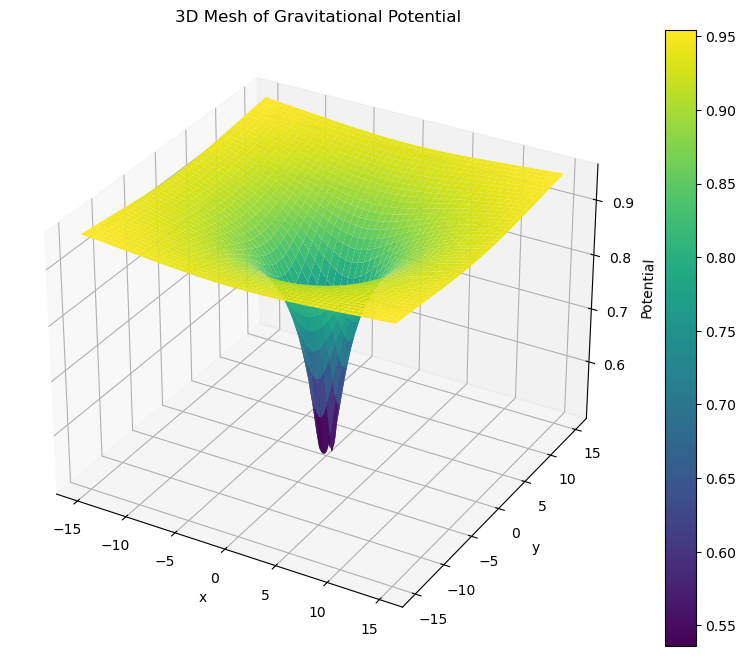

In [22]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

surface = ax.plot_surface(X, Y, -pots, cmap='viridis', edgecolor='none')
fig.colorbar(surface)

ax.set_title('3D Mesh of Gravitational Potential')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Potential')

plt.show()